# A3 :  Feature Selection for Accident Dataset
- Find which features impact 

### Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 1

The best practice is to define a classification program for the dataset(s) of your term project. 

In case a classification problem is not possibly defined for your datasets, you can use the cancer dataset in the example above. 

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- max_depth = 2
- Apply k=3 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Construct  a decision tree using the following parameters

- Use information gini measure
- max_depth = 2
- Apply k=3 cross validation and print a summary of statistics (performance evaluation) for each fold

#### 3. Performance comparisons

- Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 4. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

# START CODE

### 0. Load a subset of our project  data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_full = pd.read_csv("../../project_data/US_accidents_full_cleaned_1.csv",)
df_sign = pd.read_csv("../../project_data/US_accidents_signs_only_cleaned_1.csv")

In [4]:
df_full.head()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,0,A-2716600,3,40.108910,-83.092860,40.112060,-83.031870,3.230,58.0,29.76,...,False,False,False,False,False,False,False,False,False,False
1,5,A-2716605,3,39.172393,-84.492792,39.170476,-84.501798,0.500,93.0,29.69,...,False,False,False,False,False,True,True,True,True,False
2,6,A-2716606,2,39.063240,-84.032430,39.067310,-84.058510,1.427,100.0,29.66,...,False,False,False,True,False,True,True,True,True,True
3,7,A-2716607,2,39.067080,-84.058550,39.063020,-84.032540,1.423,100.0,29.66,...,False,False,False,False,False,True,True,True,True,False
4,8,A-2716608,2,39.775650,-84.186030,39.772750,-84.188050,0.227,100.0,29.63,...,False,False,False,False,False,True,True,True,True,False


In [5]:
df_sign.head()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,6,A-2716606,2,39.063240,-84.032430,39.067310,-84.058510,1.427,100.0,29.66,...,False,False,False,True,False,True,True,True,True,True
1,9,A-2716609,2,41.375310,-81.820170,41.367860,-81.821740,0.521,92.0,29.63,...,False,False,False,False,False,True,True,True,True,True
2,13,A-2716613,2,39.138770,-84.533940,39.139770,-84.534300,0.072,96.0,29.69,...,False,False,False,True,False,True,True,True,True,True
3,62,A-2716662,2,41.035566,-81.569917,41.036015,-81.579895,0.521,74.0,29.79,...,False,False,False,False,False,True,True,True,True,True
4,94,A-2716694,2,41.096100,-81.585930,41.101860,-81.590010,0.451,80.0,30.08,...,False,False,False,False,False,True,True,True,True,True


### 1. Basic Pre-processing

In [6]:
df_sign['Severity'] = df_sign['Severity'].astype('category')
df_full['Severity'] = df_full['Severity'].astype('category')

In [7]:
df_sign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391866 entries, 0 to 391865
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             391866 non-null  int64   
 1   ID                     391866 non-null  object  
 2   Severity               391866 non-null  category
 3   Start_Lat              391866 non-null  float64 
 4   Start_Lng              391866 non-null  float64 
 5   End_Lat                391866 non-null  float64 
 6   End_Lng                391866 non-null  float64 
 7   Distance(mi)           391866 non-null  float64 
 8   Humidity(%)            391866 non-null  float64 
 9   Pressure(in)           391866 non-null  float64 
 10  Visibility(mi)         391866 non-null  float64 
 11  Wind_Speed(mph)        391866 non-null  float64 
 12  Amenity                391866 non-null  bool    
 13  Bump                   391866 non-null  bool    
 14  Crossing            

In [8]:
df_sign.tail()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
391861,1516048,A-4239391,2,33.92925,-117.41667,33.92523,-117.42377,0.493,33.0,28.93,...,False,False,False,False,False,True,True,True,True,True
391862,1516049,A-4239392,2,34.03047,-117.59817,34.03050,-117.58860,0.548,34.0,28.78,...,False,False,False,False,False,True,True,True,True,True
391863,1516052,A-4239395,2,33.85080,-117.84365,33.85075,-117.83745,0.356,50.0,29.70,...,False,False,False,False,False,True,True,True,True,True
391864,1516056,A-4239399,2,34.26103,-119.22800,34.26239,-119.23087,0.189,68.0,29.76,...,False,False,False,False,False,True,True,True,True,True
391865,1516061,A-4239404,2,33.77545,-117.84779,33.77740,-117.85727,0.561,64.0,29.74,...,False,False,False,False,False,True,True,True,True,True


In [9]:
df_full.tail()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
1370975,1516059,A-4239402,2,34.00248,-117.37936,33.99888,-117.37094,0.543,40.0,28.92,...,False,False,False,False,False,True,True,True,True,False
1370976,1516060,A-4239403,2,32.76696,-117.14806,32.76555,-117.15363,0.338,73.0,29.39,...,False,False,False,False,False,True,True,True,True,False
1370977,1516061,A-4239404,2,33.77545,-117.84779,33.77740,-117.85727,0.561,64.0,29.74,...,False,False,False,False,False,True,True,True,True,True
1370978,1516062,A-4239405,2,33.99246,-118.40302,33.98311,-118.39565,0.772,81.0,29.62,...,False,False,False,False,False,True,True,True,True,False
1370979,1516063,A-4239406,2,34.13393,-117.23092,34.13736,-117.23934,0.537,47.0,28.63,...,False,False,False,False,False,True,True,True,True,False


### 2. Normalize Data 

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Using MinMax Scalar to mormalize the dataset
# only columns from 3 to 12(including) are normalized 
df_full_norm =df_full.copy(deep=True)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df_full_norm.iloc[:,3:12] = minmax_scaler.fit_transform(df_full_norm.iloc[:,3:12])
df_full_norm.head()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,0,A-2716600,3,0.636040,0.721532,0.634239,0.722547,0.020814,0.575758,0.512582,...,False,False,False,False,False,False,False,False,False,False
1,5,A-2716605,3,0.597706,0.697137,0.595814,0.696934,0.003222,0.929293,0.511375,...,False,False,False,False,False,True,True,True,True,False
2,6,A-2716606,2,0.593238,0.705159,0.591604,0.704658,0.009195,1.000000,0.510858,...,False,False,False,True,False,True,True,True,True,True
3,7,A-2716607,2,0.593395,0.704704,0.591429,0.705110,0.009170,1.000000,0.510858,...,False,False,False,False,False,True,True,True,True,False
4,8,A-2716608,2,0.622399,0.702483,0.620392,0.702401,0.001463,1.000000,0.510341,...,False,False,False,False,False,True,True,True,True,False


In [12]:
# Using MinMax Scalar to mormalize the dataset
# only columns from 3 to 12(including) are normalized 
df_sign_norm =df_sign.copy(deep=True)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df_sign_norm.iloc[:,3:12] = minmax_scaler.fit_transform(df_sign_norm.iloc[:,3:12])
df_sign_norm.head()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,6,A-2716606,2,0.593382,0.721594,0.593401,0.721115,0.009962,1.000000,0.486654,...,False,False,False,True,False,True,True,True,True,True
1,9,A-2716609,2,0.688050,0.761044,0.687568,0.761002,0.003637,0.919192,0.486106,...,False,False,False,False,False,True,True,True,True,True
2,13,A-2716613,2,0.596474,0.712650,0.596367,0.712631,0.000503,0.959596,0.487203,...,False,False,False,True,False,True,True,True,True,True
3,62,A-2716662,2,0.674139,0.765506,0.673985,0.765315,0.003637,0.737374,0.489031,...,False,False,False,False,False,True,True,True,True,True
4,94,A-2716694,2,0.676618,0.765221,0.676680,0.765134,0.003149,0.797980,0.494333,...,False,False,False,False,False,True,True,True,True,True


# Decision Tree Models 

### 1. Set up X and y

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [14]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    #plt.figure(figsize=(15,4))
    plt.figure(figsize=(8,8))
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

# PART A: FEATURE ANALYSIS ON FULL DATA SET

In [15]:
X=df_full_norm.iloc[:,3:]
y=df_full_norm.iloc[:,2] 

In [16]:
# A simple training (1 training)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## 1. Decision Tree with Entropy Method

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.81


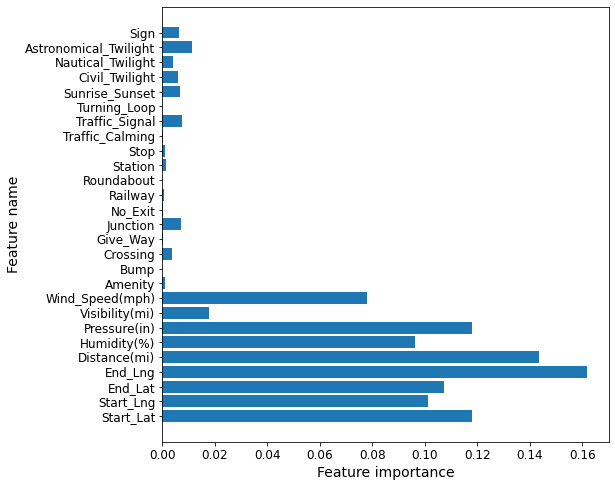

Feature importances: [1.18137814e-01 1.01179422e-01 1.07453014e-01 1.62023158e-01
 1.43649937e-01 9.63415204e-02 1.18174798e-01 1.79350009e-02
 7.78313170e-02 8.38121308e-04 3.64856915e-05 3.86074375e-03
 2.22518937e-04 6.98104226e-03 1.13824990e-04 7.77952880e-04
 3.39979985e-06 1.47264457e-03 9.26227293e-04 7.69894477e-05
 7.61255306e-03 0.00000000e+00 6.58085559e-03 6.02143910e-03
 4.05904212e-03 1.12151513e-02 6.47502570e-03]


In [17]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

## 2. Decision Tree with Gini Method

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.81


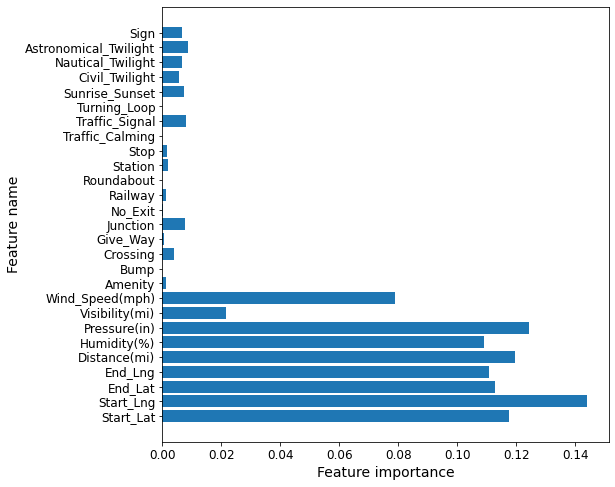

Feature importances: [1.17380787e-01 1.44108393e-01 1.12757284e-01 1.10792092e-01
 1.19430393e-01 1.09108715e-01 1.24435437e-01 2.15061372e-02
 7.87254011e-02 1.20183556e-03 5.16986443e-05 3.99672417e-03
 5.52797762e-04 7.68372151e-03 2.65496529e-04 1.18050389e-03
 5.04619881e-06 1.88658277e-03 1.61909469e-03 5.35965506e-05
 8.16337234e-03 0.00000000e+00 7.27026683e-03 5.57312139e-03
 6.74032846e-03 8.68222547e-03 6.82894729e-03]


In [18]:
clf = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

## 3. Model with K-Fold Cross-validation

In [19]:
#### Setup the tree classifier

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#X=df_norm.iloc[:,2:]
#y=df_norm.iloc[:,1] 

targets = df_full_norm.iloc[:,2].unique().astype(str)
features = df_full_norm.iloc[:,3:].columns
X= np.c_[np.array(df_full_norm.iloc[:,3:])]
y= np.c_[np.array(df_full_norm.iloc[:,2])]

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=40)

In [21]:
#### K-fold Setup

In [22]:
from sklearn.model_selection import KFold # import k-fold validation

k = 3
kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

3

In [23]:
c1_avg_precision = 0
c2_avg_precision = 0
c3_avg_precision = 0
c4_avg_precision = 0

c1_avg_recall = 0
c2_avg_recall = 0
c3_avg_recall = 0
c4_avg_recall = 0

c1_avg_f1 = 0
c2_avg_f1 = 0
c3_avg_f1 = 0 
c4_avg_f1 = 0 

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = targets
    result_metrics = classification_report(y_test, y_pred, target_names=targets)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=targets, output_dict=True)
    
    print(result_metrics_dict)
    
    # this is an example to access a measure of each class
    c1_avg_precision += result_metrics_dict['1']['precision']
    c2_avg_precision += result_metrics_dict['2']['precision']
    c3_avg_precision += result_metrics_dict['3']['precision']
    c4_avg_precision += result_metrics_dict['4']['precision']
    
    # this is an example to access a measure of each class
    c1_avg_recall += result_metrics_dict['1']['recall']
    c2_avg_recall += result_metrics_dict['2']['recall']
    c3_avg_recall += result_metrics_dict['3']['recall']
    c4_avg_recall += result_metrics_dict['4']['recall']
    
    # this is an example to access a measure of each class
    c1_avg_f1 += result_metrics_dict['1']['f1-score']
    c2_avg_f1 += result_metrics_dict['2']['f1-score']
    c3_avg_f1 += result_metrics_dict['3']['f1-score']
    c4_avg_f1 += result_metrics_dict['4']['f1-score']
    
    


/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00      9278
           2       0.81      1.00      0.89    368527
           4       0.00      0.00      0.00     47002
           1       0.00      0.00      0.00     32187

    accuracy                           0.81    456994
   macro avg       0.20      0.25      0.22    456994
weighted avg       0.65      0.81      0.72    456994



/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9278}, '2': {'precision': 0.8064154015151184, 'recall': 1.0, 'f1-score': 0.8928349490806412, 'support': 368527}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47002}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 32187}, 'accuracy': 0.8064154015151184, 'macro avg': {'precision': 0.2016038503787796, 'recall': 0.25, 'f1-score': 0.2232087372701603, 'support': 456994}, 'weighted avg': {'precision': 0.6503057998007895, 'recall': 0.8064154015151184, 'f1-score': 0.7199958539495955, 'support': 456994}}


/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00      9168
           2       0.81      1.00      0.89    368478
           4       0.00      0.00      0.00     47358
           1       0.00      0.00      0.00     31989

    accuracy                           0.81    456993
   macro avg       0.20      0.25      0.22    456993
weighted avg       0.65      0.81      0.72    456993



/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9168}, '2': {'precision': 0.8063099434783465, 'recall': 1.0, 'f1-score': 0.8927703093143188, 'support': 368478}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47358}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 31989}, 'accuracy': 0.8063099434783465, 'macro avg': {'precision': 0.20157748586958663, 'recall': 0.25, 'f1-score': 0.2231925773285797, 'support': 456993}, 'weighted avg': {'precision': 0.6501357249520544, 'recall': 0.8063099434783465, 'f1-score': 0.7198495776423743, 'support': 456993}}


/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00      9128
           2       0.81      1.00      0.89    368826
           4       0.00      0.00      0.00     46896
           1       0.00      0.00      0.00     32143

    accuracy                           0.81    456993
   macro avg       0.20      0.25      0.22    456993
weighted avg       0.65      0.81      0.72    456993

{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9128}, '2': {'precision': 0.8070714431074436, 'recall': 1.0, 'f1-score': 0.8932368957362327, 'support': 368826}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46896}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 32143}, 'accuracy': 0.8070714431074436, 'macro avg': {'precision': 0.2017678607768609, 'recall': 0.25, 'f1-score': 0.22330922393405817, 'support': 456993}, 'weighted avg': {'precision': 0.6513643142795317, 'recall': 0.8070714431074436, 'f1-sc

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print('\n class 1: ', c1_avg_precision/k)
print('\n class 2: ', c2_avg_precision/k)
print('\n class 3: ', c3_avg_precision/k)
print('\n class 4: ', c4_avg_precision/k)


 class 1:  0.0

 class 2:  0.8065989293669694

 class 3:  0.0

 class 4:  0.0


In [25]:
print('\n class 1: ', c1_avg_recall/k)
print('\n class 2: ', c2_avg_recall/k)
print('\n class 3: ', c3_avg_recall/k)
print('\n class 4: ', c4_avg_recall/k)


 class 1:  0.0

 class 2:  1.0

 class 3:  0.0

 class 4:  0.0


In [26]:
print('\n class 1: ', c1_avg_f1/k)
print('\n class 2: ', c2_avg_f1/k)
print('\n class 3: ', c3_avg_f1/k)
print('\n class 4: ', c4_avg_f1/k)


 class 1:  0.0

 class 2:  0.8929473847103976

 class 3:  0.0

 class 4:  0.0


# PART B: FEATURE ANALYSIS ON DATA THAT HAS SIGNS

In [27]:
X=df_sign_norm.iloc[:,3:]
y=df_sign_norm.iloc[:,2] 

In [28]:
# A simple training (1 training)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### 1. Decision Tree with Entropy 

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.80


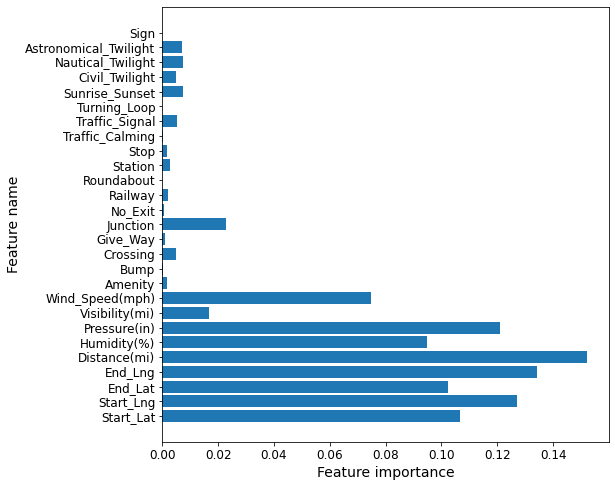

Feature importances: [1.06729436e-01 1.27174941e-01 1.02459379e-01 1.34299836e-01
 1.52291891e-01 9.49569914e-02 1.21073138e-01 1.68111517e-02
 7.47520147e-02 1.72050788e-03 9.00908305e-05 4.95385271e-03
 9.36979103e-04 2.27656720e-02 4.82273723e-04 1.92885452e-03
 0.00000000e+00 2.82216161e-03 1.60283641e-03 1.71879306e-04
 5.22215379e-03 0.00000000e+00 7.49815683e-03 4.79786902e-03
 7.29758667e-03 7.16034731e-03 0.00000000e+00]


In [29]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

### 2. Decision Tree with Gini

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.79


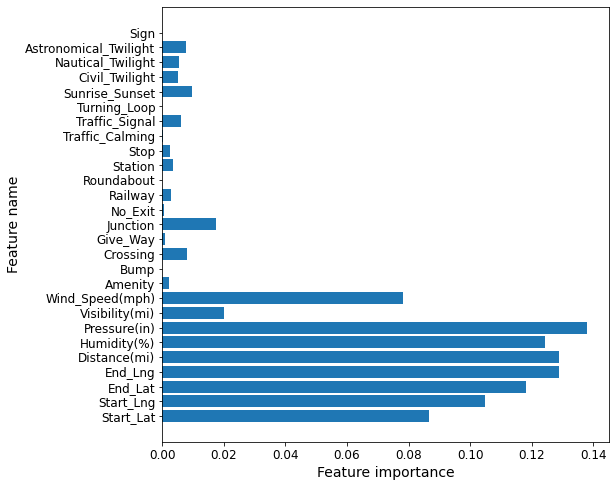

Feature importances: [8.67143782e-02 1.04944928e-01 1.18072804e-01 1.28887556e-01
 1.28963904e-01 1.24247475e-01 1.38121260e-01 1.99544037e-02
 7.82465425e-02 2.18660292e-03 4.96220657e-05 7.89390942e-03
 8.94533086e-04 1.75632275e-02 6.97979196e-04 2.67371635e-03
 0.00000000e+00 3.56412459e-03 2.38495194e-03 3.39601934e-04
 5.92309317e-03 0.00000000e+00 9.60358006e-03 5.04516012e-03
 5.44295712e-03 7.58368924e-03 0.00000000e+00]


In [30]:
clf = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

## 3. Model with K-Fold Cross-validation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#X=df_norm.iloc[:,2:]
#y=df_norm.iloc[:,1] 

targets = df_sign_norm.iloc[:,2].unique().astype(str)
features = df_sign_norm.iloc[:,3:].columns
X= np.c_[np.array(df_sign_norm.iloc[:,3:])]
y= np.c_[np.array(df_sign_norm.iloc[:,2])]

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=40)

In [32]:
#### K-fold Setup

from sklearn.model_selection import KFold # import k-fold validation

k = 3
kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

3

In [33]:
c1_avg_precision = 0
c2_avg_precision = 0
c3_avg_precision = 0
c4_avg_precision = 0

c1_avg_recall = 0
c2_avg_recall = 0
c3_avg_recall = 0
c4_avg_recall = 0

c1_avg_f1 = 0
c2_avg_f1 = 0
c3_avg_f1 = 0 
c4_avg_f1 = 0 

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = targets
    result_metrics = classification_report(y_test, y_pred, target_names=targets)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=targets, output_dict=True)
    
    print(result_metrics_dict)
    
    # this is an example to access a measure of each class
    c1_avg_precision += result_metrics_dict['1']['precision']
    c2_avg_precision += result_metrics_dict['2']['precision']
    c3_avg_precision += result_metrics_dict['3']['precision']
    c4_avg_precision += result_metrics_dict['4']['precision']
    
    # this is an example to access a measure of each class
    c1_avg_recall += result_metrics_dict['1']['recall']
    c2_avg_recall += result_metrics_dict['2']['recall']
    c3_avg_recall += result_metrics_dict['3']['recall']
    c4_avg_recall += result_metrics_dict['4']['recall']
    
    # this is an example to access a measure of each class
    c1_avg_f1 += result_metrics_dict['1']['f1-score']
    c2_avg_f1 += result_metrics_dict['2']['f1-score']
    c3_avg_f1 += result_metrics_dict['3']['f1-score']
    c4_avg_f1 += result_metrics_dict['4']['f1-score']

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/op

              precision    recall  f1-score   support

           2       0.00      0.00      0.00      5313
           3       0.78      1.00      0.87    101503
           4       0.00      0.00      0.00     15363
           1       0.00      0.00      0.00      8443

    accuracy                           0.78    130622
   macro avg       0.19      0.25      0.22    130622
weighted avg       0.60      0.78      0.68    130622

{'2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5313}, '3': {'precision': 0.7770743060127697, 'recall': 1.0, 'f1-score': 0.8745546580506194, 'support': 101503}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15363}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8443}, 'accuracy': 0.7770743060127697, 'macro avg': {'precision': 0.19426857650319243, 'recall': 0.25, 'f1-score': 0.21863866451265485, 'support': 130622}, 'weighted avg': {'precision': 0.6038444770652277, 'recall': 0.7770743060127697, 'f1-sc

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/op

              precision    recall  f1-score   support

           2       0.00      0.00      0.00      5340
           3       0.78      1.00      0.88    101599
           4       0.00      0.00      0.00     15374
           1       0.00      0.00      0.00      8309

    accuracy                           0.78    130622
   macro avg       0.19      0.25      0.22    130622
weighted avg       0.60      0.78      0.68    130622

{'2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5340}, '3': {'precision': 0.7778092511215569, 'recall': 1.0, 'f1-score': 0.8750199163727655, 'support': 101599}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15374}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8309}, 'accuracy': 0.7778092511215569, 'macro avg': {'precision': 0.1944523127803892, 'recall': 0.25, 'f1-score': 0.2187549790931914, 'support': 130622}, 'weighted avg': {'precision': 0.6049872311302771, 'recall': 0.7778092511215569, 'f1-scor

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/op

In [34]:
print('\n class 1: ', c1_avg_precision/k)
print('\n class 2: ', c2_avg_precision/k)
print('\n class 3: ', c3_avg_precision/k)
print('\n class 4: ', c4_avg_precision/k)


 class 1:  0.0

 class 2:  0.0

 class 3:  0.7769160886629614

 class 4:  0.0


In [35]:
print('\n class 1: ', c1_avg_recall/k)
print('\n class 2: ', c2_avg_recall/k)
print('\n class 3: ', c3_avg_recall/k)
print('\n class 4: ', c4_avg_recall/k)


 class 1:  0.0

 class 2:  0.0

 class 3:  1.0

 class 4:  0.0


In [36]:
print('\n class 1: ', c1_avg_f1/k)
print('\n class 2: ', c2_avg_f1/k)
print('\n class 3: ', c3_avg_f1/k)
print('\n class 4: ', c4_avg_f1/k)


 class 1:  0.0

 class 2:  0.0

 class 3:  0.8744542187829437

 class 4:  0.0


# 4. Feature Selection WA with Undersampling
- We are only undersampling the trainind data set

In [43]:
# read file which has satte information
df_2 = pd.read_csv("../../project_data/washington_timestamp_data.csv")
df_2.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,...,False,False,False,False,False,False,False,False,False,False
1,5,A-2716605,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,...,False,False,False,False,False,True,True,True,True,False
2,6,A-2716606,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,...,False,False,False,True,False,True,True,True,True,True
3,7,A-2716607,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,...,False,False,False,False,False,True,True,True,True,False
4,8,A-2716608,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,...,False,False,False,False,False,True,True,True,True,False


In [45]:
df_2.shape

(1370980, 33)

In [69]:
# subsetting rows only with WA
df_wa = df_2[df_2['State']=='WA']
df_wa.shape

(19974, 33)

In [120]:
df_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19974 entries, 91570 to 1370904
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19974 non-null  int64  
 1   ID                     19974 non-null  object 
 2   Severity               19974 non-null  int64  
 3   Start_Time             19974 non-null  object 
 4   End_Time               19974 non-null  object 
 5   Start_Lat              19974 non-null  float64
 6   Start_Lng              19974 non-null  float64
 7   End_Lat                19974 non-null  float64
 8   End_Lng                19974 non-null  float64
 9   Distance(mi)           19974 non-null  float64
 10  State                  19974 non-null  object 
 11  Humidity(%)            19974 non-null  float64
 12  Pressure(in)           19974 non-null  float64
 13  Visibility(mi)         19974 non-null  float64
 14  Wind_Speed(mph)        19974 non-null  float64
 

In [121]:
# import RandomUndersampler
from imblearn.under_sampling import RandomUnderSampler

In [122]:
# normalizing WA Data
# Using MinMax Scalar to mormalize the dataset
df_wa_norm =df_wa.copy(deep=True)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df_wa_norm.iloc[:,5:10] = minmax_scaler.fit_transform(df_wa.iloc[:,5:10])
df_wa_norm.iloc[:,11:15] = minmax_scaler.fit_transform(df_wa.iloc[:,11:15])
df_wa_norm.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
91570,110980,A-2827580,2,2016-11-30 12:49:30,2016-11-30 18:49:30,0.423466,0.204540,0.422690,0.204516,0.002210,...,False,False,False,False,False,True,True,True,True,False
91578,110990,A-2827590,2,2016-11-30 14:00:35,2016-11-30 20:00:35,0.515104,0.068820,0.514843,0.068813,0.000049,...,False,False,False,False,False,True,True,True,True,False
91595,111012,A-2827612,3,2016-11-30 14:52:55,2016-11-30 20:52:55,0.675541,0.296075,0.673274,0.294896,0.009970,...,False,False,False,False,False,True,True,True,True,False
91617,111037,A-2827637,2,2016-11-30 15:25:58,2016-11-30 21:25:58,0.763886,0.300977,0.763558,0.301261,0.001719,...,False,True,False,False,False,True,True,True,True,True
91661,111088,A-2827688,3,2016-11-30 16:48:47,2016-11-30 22:48:47,0.592793,0.302974,0.594220,0.302211,0.007842,...,False,False,False,False,False,False,True,True,True,False


In [123]:
# check normalization
df_wa_norm.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,1.997400e+04,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000
mean,8.616741e+05,2.415991,0.555134,0.299874,0.554796,0.299858,0.007514,0.702760,0.755937,0.911598,0.190426
std,4.934051e+05,0.739639,0.159917,0.121891,0.160166,0.121867,0.021790,0.211923,0.105911,0.220510,0.117116
min,1.109800e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.795820e+05,2.000000,0.502344,0.272249,0.501076,0.272226,0.000278,0.554348,0.713896,1.000000,0.121053
50%,9.520530e+05,2.000000,0.584702,0.284533,0.584387,0.284458,0.002816,0.739130,0.776567,1.000000,0.181579
75%,1.313616e+06,3.000000,0.620554,0.298832,0.620244,0.299000,0.008562,0.880435,0.817439,1.000000,0.242105
max,1.515987e+06,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
# setting up X and Y for model
X_wa=df_wa_norm.iloc[:,5:]
X_wa = X_wa.drop('State',axis=1)
y_wa=df_wa_norm.iloc[:,2] 

In [128]:
X_wa.shape

(19974, 27)

In [129]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_wa, y_wa, random_state = 42)
X_train.shape

(14980, 27)

In [130]:
# valuecounts before undersampling
y_train.value_counts()

2    9926
3    2790
4    1917
1     347
Name: Severity, dtype: int64

In [131]:
under = RandomUnderSampler(sampling_strategy='auto')
X_train, y_train = under.fit_resample(X_train, y_train)

In [132]:
X_train.shape

(1388, 27)

In [133]:
# After undersampling
y_train.value_counts()

1    347
2    347
3    347
4    347
Name: Severity, dtype: int64

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.37


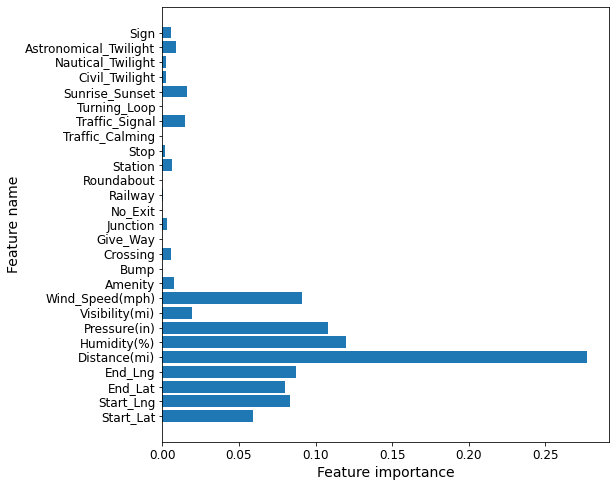

Feature importances: [0.05908346 0.08361288 0.08005054 0.08698847 0.277422   0.12014232
 0.10779135 0.01916473 0.09133514 0.0078338  0.         0.00572971
 0.         0.00310906 0.         0.00039165 0.         0.00641695
 0.00145324 0.         0.01478844 0.         0.0158162  0.00245662
 0.00208133 0.00886132 0.00547078]


In [134]:
# Tree Model and feature selection
clf = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X_wa.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [135]:
y_pred = tree_clf.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [136]:
targets = df_wa.iloc[:,2].unique().astype(str)
features = df_wa.iloc[:,5:].columns

In [139]:
target_names = targets
result_metrics = classification_report(y_test, y_pred, target_names=targets)
print(result_metrics)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       147
           3       0.66      1.00      0.79      3294
           4       0.00      0.00      0.00       927
           1       0.00      0.00      0.00       626

    accuracy                           0.66      4994
   macro avg       0.16      0.25      0.20      4994
weighted avg       0.44      0.66      0.52      4994



/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NEXT - B1- CNN-early-stoppage.ipynb